In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.font_manager as font_manager
import os

!pip install numpy rclpy rosbag2_py rosidl-runtime-py

import numpy as np
import rosbag2_py
import rclpy
from rclpy.serialization import deserialize_message
from rosidl_runtime_py.utilities import get_message
from dynus_interfaces.msg import Goal, State

# font
font = font_manager.FontProperties()
font.set_family('serif')
plt.rcParams.update({"text.usetex": True})
plt.rcParams["font.family"] = "Times New Roman"
font.set_size(40)

In [10]:
def read_ros2_bag(bag_path, topic_name, message_type):
    """
    Reads a ROS 2 bag file and extracts messages from a specified topic.

    Args:
        bag_path (str): Path to the ROS 2 bag file.
        topic_name (str): The name of the topic to extract data from.
        message_type (str): The message type as a string (e.g., "geometry_msgs/msg/Twist").

    Returns:
        list: A list of messages from the specified topic.
    """
    storage_options = rosbag2_py.StorageOptions(uri=bag_path, storage_id="sqlite3")
    converter_options = rosbag2_py.ConverterOptions(
        input_serialization_format="cdr", output_serialization_format="cdr"
    )

    reader = rosbag2_py.SequentialReader()
    reader.open(storage_options, converter_options)

    all_topics = reader.get_all_topics_and_types()
    topic_names = [topic.name for topic in all_topics]

    topic_found = any(t == topic_name for t in topic_names)
    if not topic_found:
        print(f"Topic '{topic_name}' not found in the bag.")
        return []

    # Resolve the message type dynamically
    msg_type = get_message(message_type)

    data = []
    while reader.has_next():
        topic, serialized_msg, _ = reader.read_next()
        if topic == topic_name:
            msg = deserialize_message(serialized_msg, msg_type)
            data.append(msg)

    return data

def process_state_data(messages):
    """
    Processes state data to extract desired values and computes averages.

    Args:
        messages (list): List of ROS 2 messages.

    Returns:
        np.ndarray: Array of extracted values.
    """
    
    # Get the very first msg's time stamp
    # start_time = messages[0].header.stamp.sec + messages[0].header.stamp.nanosec * 1e-9

    # Extract velocities
    velocities = [np.linalg.norm(np.array([msg.vel.x, msg.vel.y, msg.vel.z])) for msg in messages]

    return np.array(velocities)


def process_goal_data(messages):
    """
    Processes goal data to extract desired values and computes averages.

    Args:
        messages (list): List of ROS 2 messages.

    Returns:
        np.ndarray: Array of extracted values.
    """
    
    # Extract velocities
    velocities = [np.linalg.norm(np.array([msg.v.x, msg.v.y, msg.v.z])) for msg in messages]

    return np.array(velocities)

def plot_velocity_histogram(velocities, bins=30, title="Velocity Profile", xlabel="Velocity (m/s)", ylabel="Frequency", output_file=None):
    """
    Plots a histogram of the velocity profile.

    Args:
        velocities (np.ndarray): Array of velocity values.
        bins (int): Number of bins for the histogram. Default is 30.
        title (str): Title of the plot. Default is "Velocity Profile".
        xlabel (str): Label for the x-axis. Default is "Velocity (m/s)".
        ylabel (str): Label for the y-axis. Default is "Frequency".
        output_file (str): If provided, saves the plot to this file. Default is None.
    """
    # Create the histogram
    plt.figure(figsize=(10, 6))
    weights = velocities / len(velocities)
    plt.hist(velocities, weights=weights, bins=bins, color="skyblue", edgecolor="black", alpha=0.7)
    
    # Add titles and labels
    plt.title(title, fontproperties=font, weight='bold')
    plt.xlabel(xlabel, fontproperties=font)
    plt.ylabel(ylabel, fontproperties=font)
    plt.xticks(fontproperties=font)
    plt.yticks(fontproperties=font)
    
    # Grid and styling
    plt.grid(color='gray', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    
    # Show or save the plot
    if output_file:
        plt.savefig(output_file, bbox_inches='tight', dpi=300)
        print(f"Plot saved as {output_file}")
    else:
        plt.show()

In [5]:
# Get DGP's data 
bag_path = "/media/kkondo/T7/dynus/tro_paper/hardware/uav/dyn_sta/num_9_folder/num_9"
topic_name = "/PX01/state"
message_type = "dynus_interfaces/msg/State"  # Update with your message type

# Initialize arrays to store data
dgp_pos_array = np.array([])
dgp_vel_array = np.array([])
dgp_accel_array = np.array([])
dgp_jerk_array = np.array([])
dgp_travel_time_array = np.array([])
dgp_path_length_array = np.array([])

# Read the bag and extract data
messages = read_ros2_bag(bag_path, topic_name, message_type)

if not messages:
    print(f"No messages found or topic does not exist in {bag_path}.")
    
# Process data
vel = process_state_data(messages)

# compute the highest velocity
highest_velocity = np.max(vel)
print(f"Highest velocity: {highest_velocity} m/s")

[INFO] [1744994875.500698487] [rosbag2_storage]: Opened database '/media/kkondo/T7/dynus/tro_paper/hardware/uav/dyn_sta/num_9_folder/num_9/num_1_0.db3' for READ_ONLY.


Highest velocity: 4.882867920875309 m/s


In [ ]:
# Get DGP's data 
bag_path = "/media/kkondo/T7/dynus/tro_paper/hardware/uav/dyn_sta/num_7_folder/num_7"
topic_name = "/PX01/state"
message_type = "dynus_interfaces/msg/State"  # Update with your message type

# Initialize arrays to store data
dgp_vel_array = np.array([])
# Read the bag and extract data
messages = read_ros2_bag(bag_path, topic_name, message_type)

if not messages:
    print(f"No messages found or topic does not exist in {bag_path}.")
    
# Process data
vel = process_state_data(messages)

# compute the highest velocity
highest_velocity = np.max(vel)
print(f"Highest velocity: {highest_velocity} m/s")

[INFO] [1744996592.088041066] [rosbag2_storage]: Opened database '/media/kkondo/T7/dynus/tro_paper/hardware/uav/dyn_sta/num_7_folder/num_7/num_1_0.db3' for READ_ONLY.


Highest velocity: 5.558179490847036 m/s


In [11]:
# Get DGP's data 
bag_path = "/media/kkondo/T7/dynus/tro_paper/hardware/uav/dyn_sta/num_7_folder/num_7"
topic_name = "/PX01/goal"
message_type = "dynus_interfaces/msg/Goal"  # Update with your message type

# Initialize arrays to store data
dgp_vel_array = np.array([])

# Read the bag and extract data
messages = read_ros2_bag(bag_path, topic_name, message_type)

if not messages:
    print(f"No messages found or topic does not exist in {bag_path}.")
    
# Process data
vel = process_goal_data(messages)

# compute the highest velocity
highest_velocity = np.max(vel)
print(f"Highest velocity: {highest_velocity} m/s")

[INFO] [1744996987.773814025] [rosbag2_storage]: Opened database '/media/kkondo/T7/dynus/tro_paper/hardware/uav/dyn_sta/num_7_folder/num_7/num_1_0.db3' for READ_ONLY.


Highest velocity: 4.5751318048738465 m/s


In [7]:
# Get DGP's data 
bag_path = "/media/kkondo/T7/dynus/tro_paper/hardware/uav/dyn_sta/num_8_folder/num_8"
topic_name = "/PX01/state"
message_type = "dynus_interfaces/msg/State"  # Update with your message type

# Initialize arrays to store data
dgp_pos_array = np.array([])
dgp_vel_array = np.array([])
dgp_accel_array = np.array([])
dgp_jerk_array = np.array([])
dgp_travel_time_array = np.array([])
dgp_path_length_array = np.array([])

# Read the bag and extract data
messages = read_ros2_bag(bag_path, topic_name, message_type)

if not messages:
    print(f"No messages found or topic does not exist in {bag_path}.")
    
# Process data
vel = process_state_data(messages)

# compute the highest velocity
highest_velocity = np.max(vel)
print(f"Highest velocity: {highest_velocity} m/s")

[INFO] [1744996619.276787984] [rosbag2_storage]: Opened database '/media/kkondo/T7/dynus/tro_paper/hardware/uav/dyn_sta/num_8_folder/num_8/num_1_0.db3' for READ_ONLY.


Highest velocity: 4.591692794730659 m/s


In [12]:
# Get DGP's data 
bag_path = "/media/kkondo/T7/dynus/tro_paper/hardware/uav/dyn_sta/num_8_folder/num_8"
topic_name = "/PX01/goal"
message_type = "dynus_interfaces/msg/Goal"  # Update with your message type

# Initialize arrays to store data
dgp_vel_array = np.array([])

# Read the bag and extract data
messages = read_ros2_bag(bag_path, topic_name, message_type)

if not messages:
    print(f"No messages found or topic does not exist in {bag_path}.")
    
# Process data
vel = process_goal_data(messages)

# compute the highest velocity
highest_velocity = np.max(vel)
print(f"Highest velocity: {highest_velocity} m/s")

[INFO] [1744999884.050627515] [rosbag2_storage]: Opened database '/media/kkondo/T7/dynus/tro_paper/hardware/uav/dyn_sta/num_8_folder/num_8/num_1_0.db3' for READ_ONLY.


Highest velocity: 4.027258391687517 m/s


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

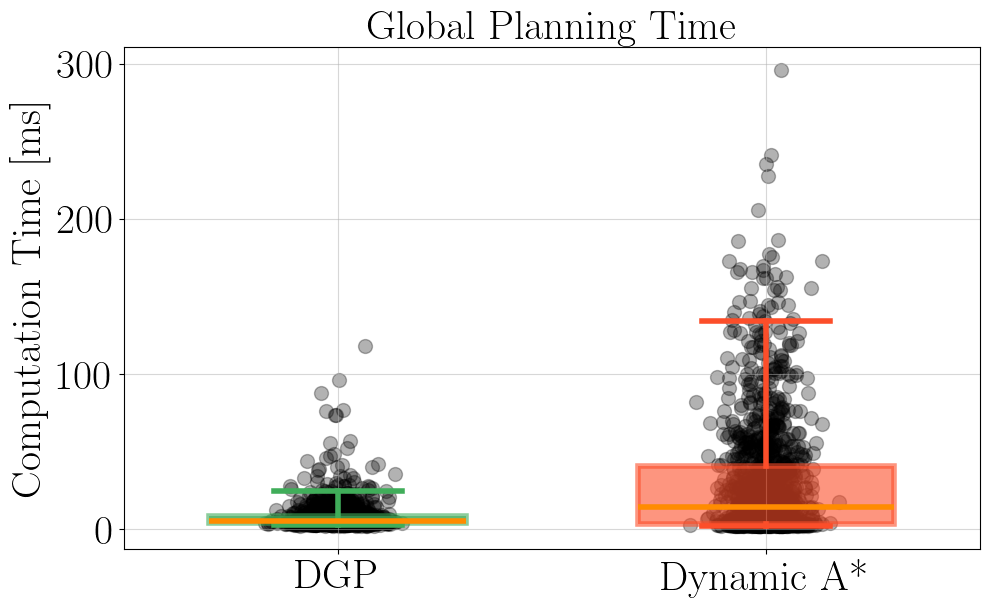

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define font properties (modify as needed)
from matplotlib import font_manager
font = {
    'family': 'Arial',
    'weight': 'normal',
    'size': 30,
}

# List of algorithms and corresponding colors
algorithms = ["dgp", "dastar"]
parent_folder_path = "/media/kkondo/T7/dynus/tro_paper/yaw_optimization/success/"
dgp_color = "#40AD5A"
dastar_color = "#FC4E2A"

# The header to plot
header_to_plot = "Global Planning Time [ms]"

# Create the figure
figsize_x = 10
figsize_y = figsize_x / 1.618  # Golden ratio
fig, ax_box = plt.subplots(figsize=(figsize_x, figsize_y))

# This index will denote x-axis positions (starting at 1 to help with tick labels)
idx = 1
algorithm_labels = []  # To store labels for the x-axis

for algorithm in algorithms:
    if algorithm == "dgp":
        folder_path = os.path.join(parent_folder_path, "dgp/csv/")
        color = dgp_color
        label = "DGP"
    elif algorithm == "dastar":
        folder_path = os.path.join(parent_folder_path, "dastar/csv/")
        color = dastar_color
        label = "Dynamic A*"
    
    # Get and filter data (ensure these functions are defined in your code)
    float_data = get_data(folder_path, "dynus")
    float_data = filter_data(float_data)
    headers = list(float_data.keys())
    
    # Look for the header that matches the target header
    for i in range(1, len(headers)):  # Adjusted for your simulated data structure
        if headers[i] == header_to_plot:
            data_points = float_data[headers[i]]
            # Create boxplot with original whisker settings
            # Note: omitting 'vert=False' uses the default vertical orientation
            box = ax_box.boxplot(
                data_points,
                positions=[idx],
                widths=0.6,
                patch_artist=True,
                showfliers=False,
                whis=[3, 97]
            )
            for element in ['whiskers', 'fliers', 'means', 'caps']:
                plt.setp(box[element], color=color, linewidth=4)
            for patch in box['boxes']:
                patch.set(facecolor=color, alpha=0.6)
                patch.set(color=color, linewidth=4, edgecolor=color)
            for median_line in box['medians']:
                median_line.set_color('darkorange')  # Median line color
                median_line.set_linewidth(4)  # Thicker median line

            # Add jittered data points for additional visualization (jitter horizontally)
            jitter = np.random.normal(0, 0.05, len(data_points))  # Small random offset for x-axis
            ax_box.scatter(idx + jitter, data_points, color='black', alpha=0.3, s=100)
            
            # Save the label for the tick and move to next position
            algorithm_labels.append(label)
            idx += 1

# Set x-axis ticks using the algorithm labels
ax_box.set_xticks(range(1, len(algorithm_labels) + 1))
ax_box.set_xticklabels(algorithm_labels, fontproperties=font)
# ax_box.set_xlabel("Algorithm", fontproperties=font)
ax_box.tick_params(axis='y', labelsize=font['size'])
ax_box.set_ylabel("Computation Time [ms]", fontproperties=font)
ax_box.set_title("Global Planning Time", fontproperties=font)
ax_box.grid(alpha=0.5)

plt.tight_layout()
# plt.show()

# save the figure
output_folder_name = "/media/kkondo/T7/dynus/tro_paper/yaw_optimization/success/figs/"
os.makedirs(output_folder_name, exist_ok=True)
plt.savefig(os.path.join(output_folder_name, "global_planner_benchmark_boxplot.pdf"), bbox_inches='tight', pad_inches=0.1)
